# Visualization

Swan offers many different visualization options to understand your transcriptomes. This tutorial includes instructions on the following:

* [Gene summary graphs](#gene_summary)
* [Transcript path graphs](#transcript_path)
* [Saving a figure](#save_fig)
* [Swan reports](#swan_report)

Running this tutorial on my laptop took under a minute and 3 GB of RAM.

In [1]:
# this is just to display saved images
from IPython.display import display, Image

In [6]:
%matplotlib inline
import swan_vis as swan

# code to download this data is in the Getting started tutorial
sg = swan.read('data/swan.p')

Read in graph from data/swan.p


## <a name="gene_summary"></a>Gene summary graphs
Gene summary graphs display a high-level summary of the complexity of splicing within a certain gene locus. All observed splice sites and splice junctions from input datasets, and the annotation (if added) are plotted in full color. Genes can be called to be plotted either using their gene ids or gene names, but we recommend using gene ids as we have encountered redundant gene names during testing.

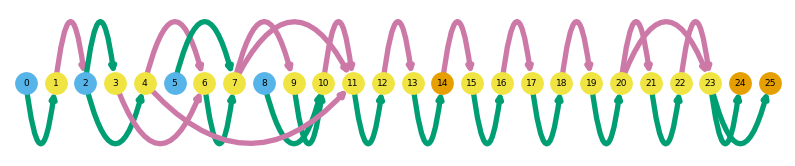

In [36]:
# plot a gene summary graph for the given gene
sg.plot_graph('ADRM1')

Gene summary graphs are a type of graph plot and therefore have plotting options that allow the user to highlight nodes and edges that are either not present in the annotation (`indicate_novel`) or those that come from a specific dataset (`indicate_dataset`).

For instance, say we want to highlight the nodes and edges that are not seen in the annotation. In this representation, nodes (splice sites) that are not present in the annotation will appear outlined, and intronic or exonic regions (edges) that are not present in the annotation will appear dashed.  

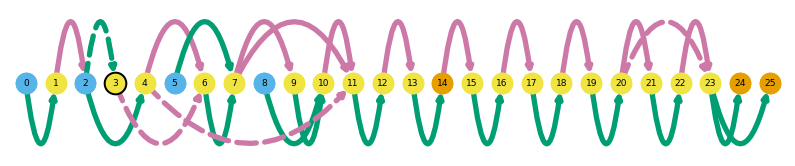

In [37]:
# plot a gene summary graph with novel splice sites and 
# splice junctions plotted as outlined nodes and dashed edges respectively
sg.plot_graph('ADRM1', indicate_novel=True)

<!-- Similarly, you can highlight the nodes that come from a specific dataset. Outlined nodes and dashed edges are those that are present in the queried dataset. -->

In [38]:
# # plot a gene summary graph with splice sites and splice junctions
# # that are present in the indicated dataset as outlined nodes
# # and dashed edges respectively
# sg.plot_graph('ADRM1', indicate_dataset='hepg2_1_chr20')

<!-- By default `plot_graph` will display the image immediately. To avoid this, set `display=False`. -->

In [39]:
# # plot a gene summary graph without displaying it
# sg.plot_graph('ADRM1', indicate_novel=True, display=False)

## <a name="transcript_path"></a>Transcript path graphs


Transcript path graphs display the same structure as gene summary graphs but gray out nodes and edges (splice sites and intronic/exonic regions) that are not present in the given transcript. In this case, the transcript id field is needed to plot the path.

In [40]:
# sg.t_df.loc[sg.t_df.gname=='ADRM1']

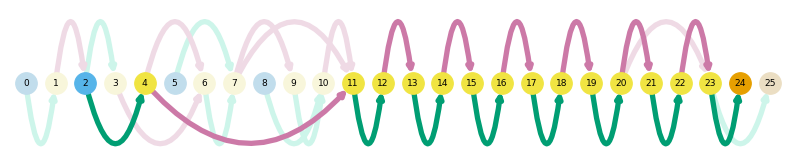

In [41]:
# plot the path of a specific transcript through its parent gene
# summary graph for a given transcript
sg.plot_transcript_path('TALONT000301961')

There are also `indicate_novel` and `indicate_dataset` options that allow the user to highlight the nodes and edges that are not present in the annotation.

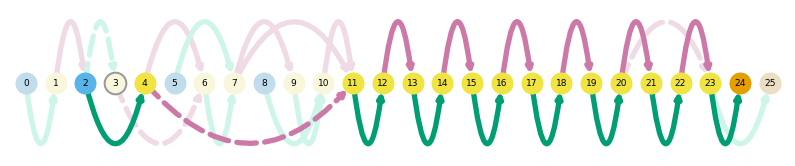

In [42]:
# plot the path of a specific transcript through its parent gene summary
# graph for a given transcript
# plot novel splice sites as outlined nodes
# plot novel splice junctions as dashed edges
sg.plot_transcript_path('TALONT000301961', indicate_novel=True)

In [43]:
# # plot the path of a specific transcript through its parent gene summary
# # graph for a given transcript
# # plot splice sites from the given dataset as outlined nodes
# # plot splice junctions from the given dataset as dashed edges
# sg.plot_transcript_path('TALONT000301953', indicate_dataset='HFFc6_1')

For transcripts, there is also a unique option that allows you to generate the genome-browser style representation of a transcript, using the `browser` option.

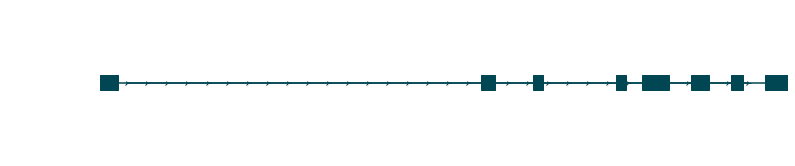

In [44]:
# plot the traditional browser-style representation 
# for a given transcript
sg.plot_transcript_path('TALONT000301961', browser=True)

## <a name="save_fig"></a>Saving a figure

Saving a figure in Swan for `plot_graph` and for `plot_transcript_path` can be done in two different ways.

The first way involves calling `save_fig` after your figure has been generated. This method allows you to give your figure whatever name you want.

In [45]:
# plot gene summary graph for a given gene
sg.plot_graph('ADRM1')

# save the currently-plotted figure with the given filename and location
swan.save_fig('figures/my_gene_summary.png')

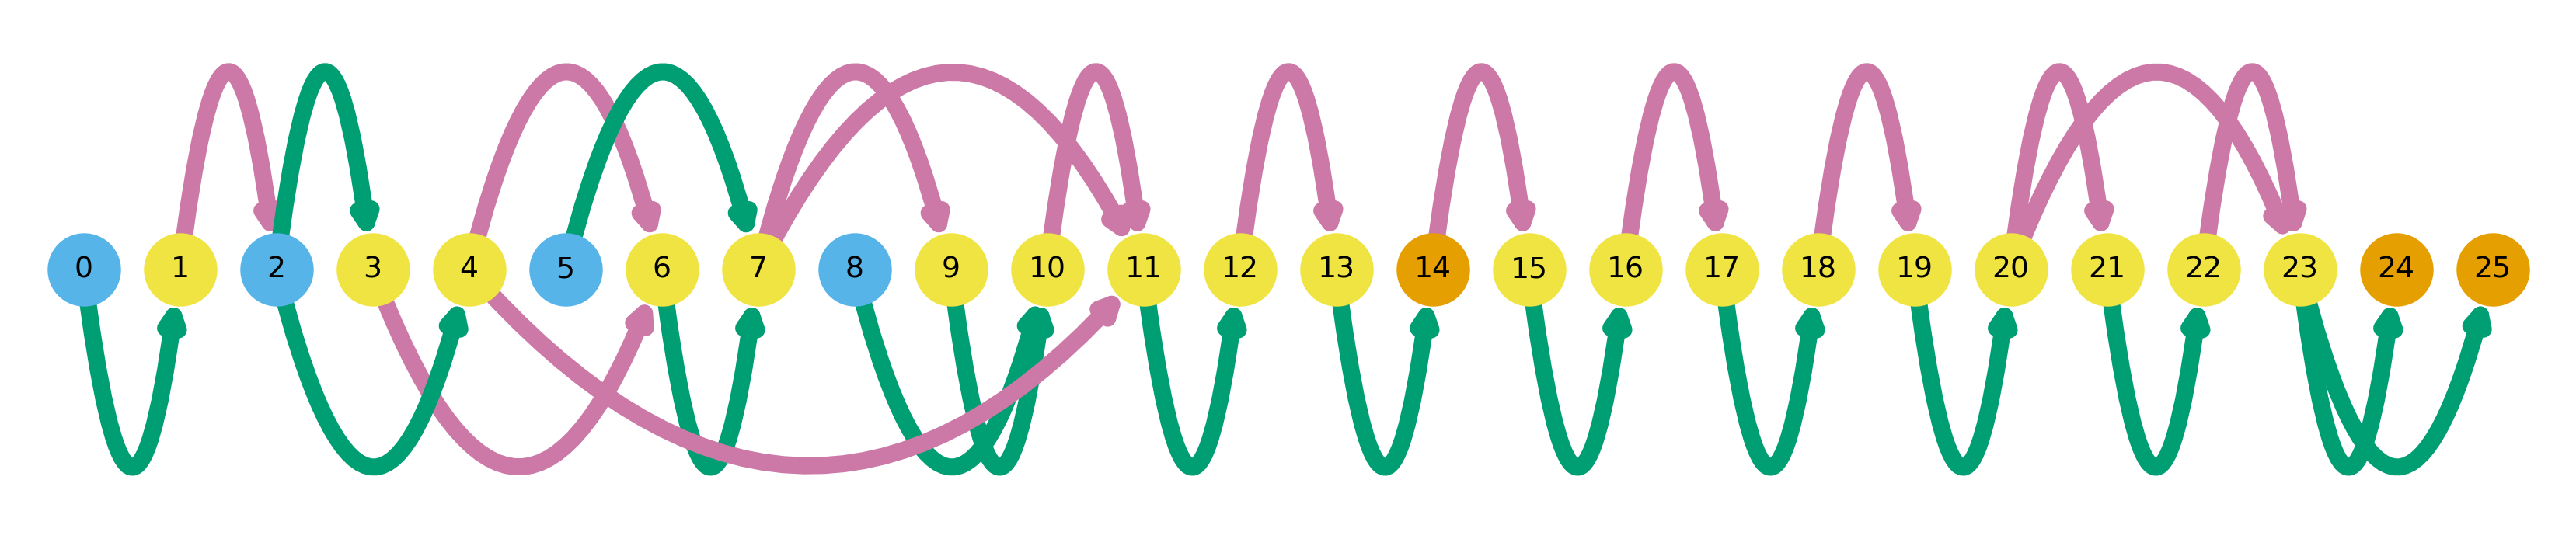

In [46]:
display(Image(filename='figures/my_gene_summary.png'))

The second way only requires one line of code and requires that the user pass the corresponding plotting function a `prefix` for the filename and path. The file will be automatically named according to the settings in the graph.

In [47]:
# plot a gene summary graph with novel splice sites and junctions
# outlined and dashed respectively
# save the figure with the given prefix
sg.plot_graph('ADRM1', indicate_novel=True, prefix='figures/adrm1')

Saving summary graph for ENSG00000130706.12 as figures/adrm1_novel_ENSG00000130706.12_summary.png


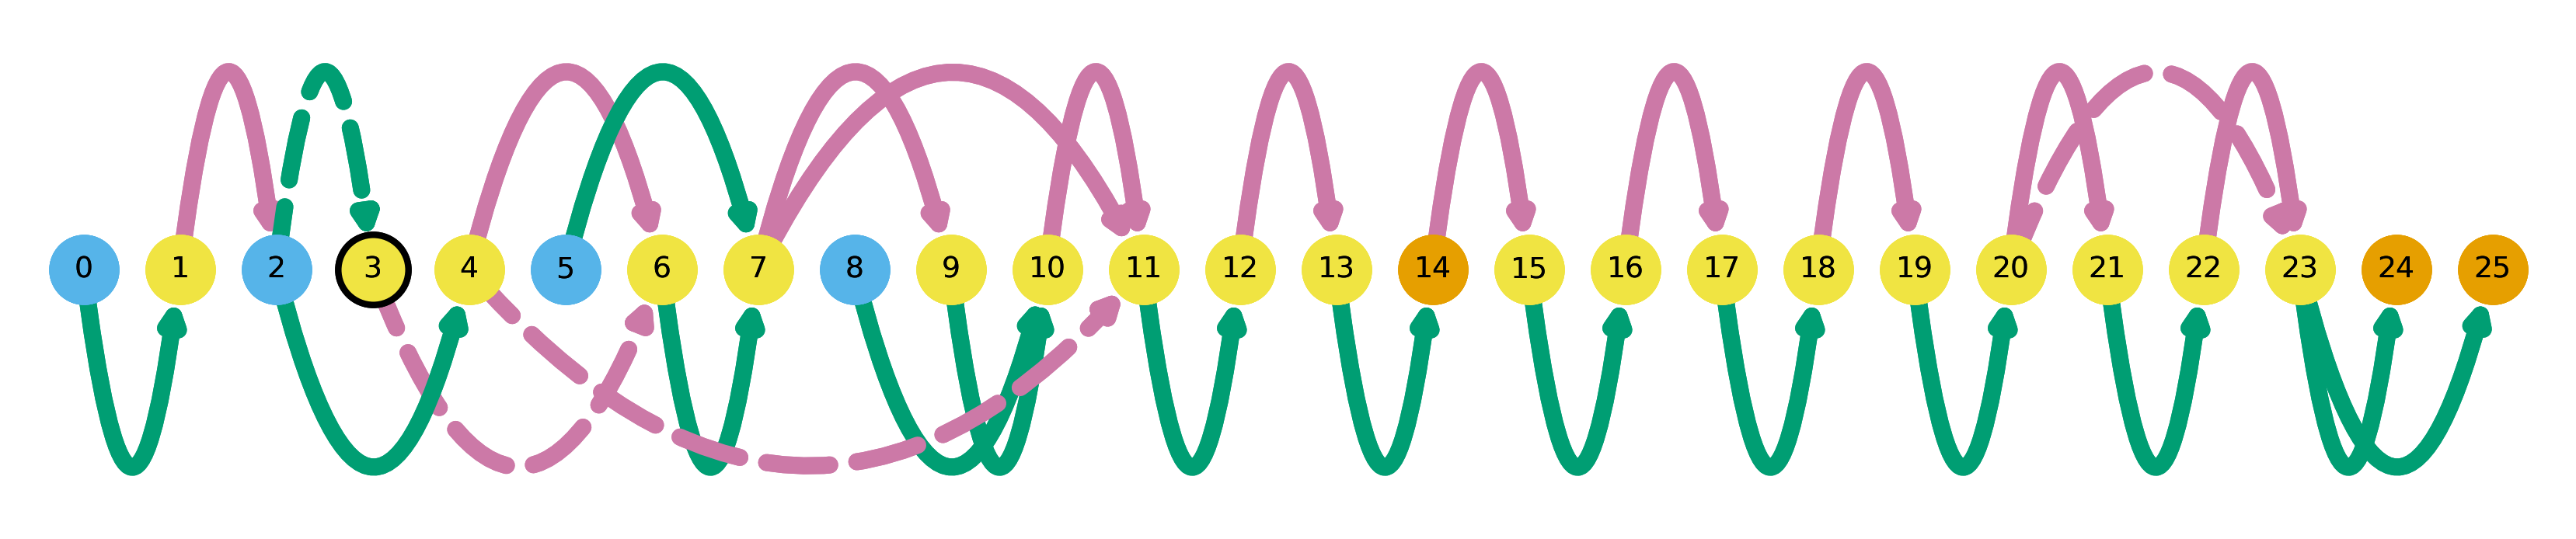

In [48]:
display(Image(filename='figures/adrm1_novel_ENSG00000130706.12_summary.png'))

As you can see, here the gene name ADRM1 is not used to save the figure because we have encountered conflicing gene names in our internal use of Swan. To avoid these clashes, Swan automatically fetches the gene id associated with the first instance of the gene name it finds and uses it to save the graph, in the interest of not accidentally overwriting a preexisting file.

## <a name="swan_report"></a>Swan reports

Swan reports display all the expressed transcripts in a given gene in a PDF format. There are many ways to customize these reports so here are a few. Unlike the above plotting options, the user must provide a `prefix` argument as there are many files that must be automatically generated to create the report.

In [56]:
# generate a report for the given gene 
# save it with the given filepath prefix
# include differential transcript expression test significance results
# (defaults to significance threshold q >= 0.05)
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
sg.gen_report('ADRM1',
              prefix='figures/adrm1_paper',
              novelty=True, 
              indicate_novel=True)


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_paper_novel_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_paper_novel_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_paper_novel_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_paper_novel_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_paper_novel_TALONT000301961_path.png
Generating report for ENSG00000130706.12


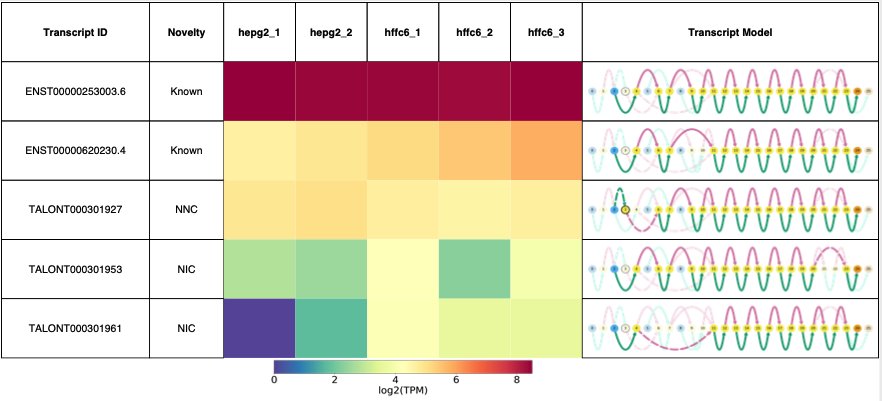

In [54]:
display(Image(filename='figures/adrm1_paper_novel_ENSG00000130706.12_report.png'))

You can also plot transcripts based on their percent isoform (pi) values using `layer=pi`, which help illustrate the basis on which isoform switches are called in Swan. Here I'm choosing to plot it in a separate color using the `cmap` argument to make it clear that the metric being plotted is different, and overlaying each cell with the pi value using `display_numbers=True`. 

For this example, I'll plot a gene that was called as isoform switching by the Swan isoform switching module, NIPAL3.

In [60]:
# generate a report for the given gene 
# save it with the given filepath prefix
# plot the percent isoform (pi) values 
# use the magma color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
sg.gen_report('NIPAL3',
              prefix='figures/nipal3',
              layer='pi',
              cmap='magma',
              display_numbers=True,
              novelty=True, 
              indicate_novel=True)


Plotting transcripts for ENSG00000001461.16
Saving transcript path graph for ENST00000374399.8 as figures/nipal3_novel_ENST00000374399.8_path.png
Saving transcript path graph for ENST00000339255.2 as figures/nipal3_novel_ENST00000339255.2_path.png
Saving transcript path graph for ENST00000488155.1 as figures/nipal3_novel_ENST00000488155.1_path.png
Saving transcript path graph for ENST00000358028.8 as figures/nipal3_novel_ENST00000358028.8_path.png
Saving transcript path graph for ENST00000003912.7 as figures/nipal3_novel_ENST00000003912.7_path.png
Generating report for ENSG00000001461.16


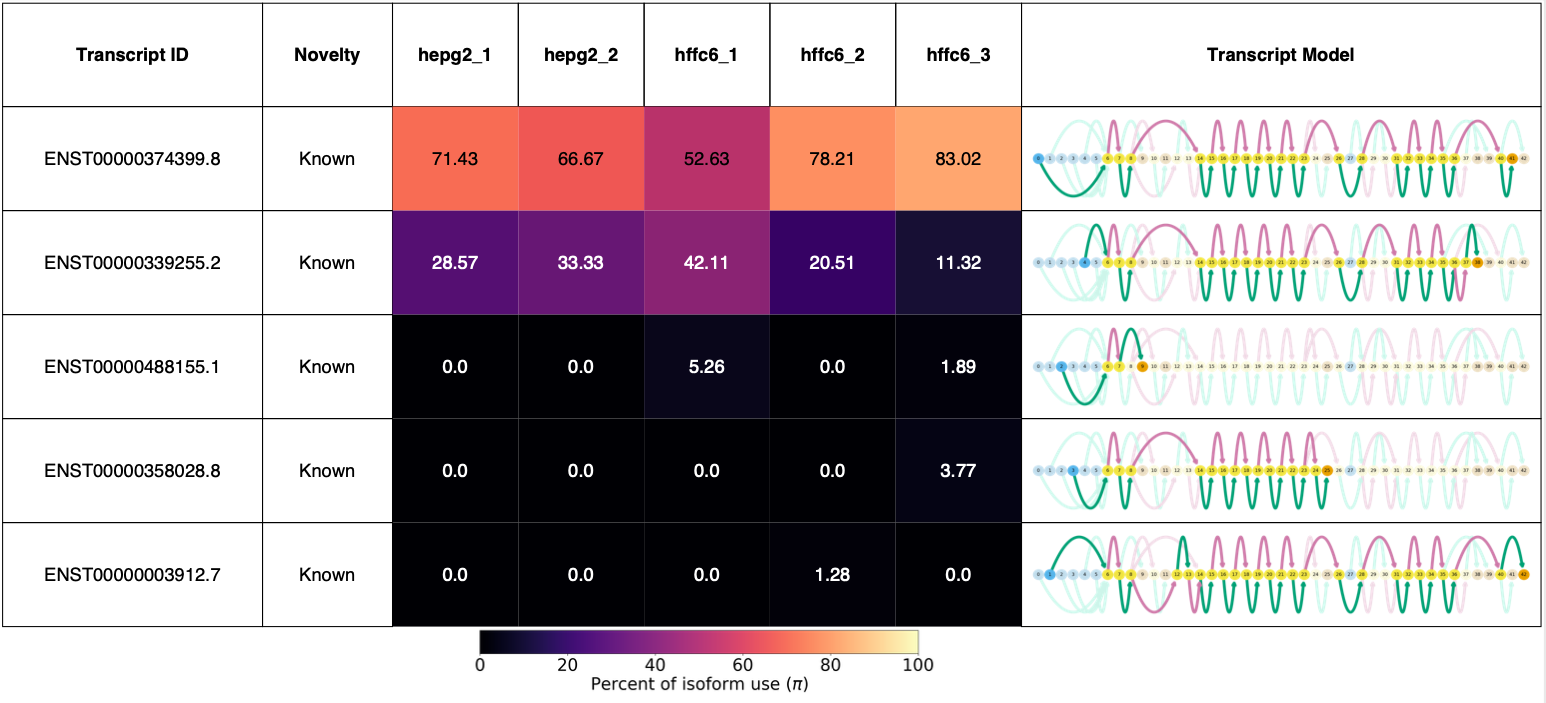

In [62]:
display(Image(filename='figures/nipal3_novel_ENSG00000001461.16_report.png'))

In these cases, it can be beneficial to actually look at the data in the original groups that the isoform switching test was performed. To group your input samples by a metadata column that can be found in `sg.adata.obs` in the report, use the `groupby` option. Here, I've also demonstrated that if you have transcript names in your GTF or TALON db, that those can be displayed instead of the transcript IDs using `transcript_name=True`.

In [64]:
# generate a report for the given gene 
# save it with the given filepath prefix
# plot the percent isoform (pi) values 
# use the magma color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
# group datasets based on the 'cell_line' metadata column
sg.gen_report('NIPAL3',
              prefix='figures/nipal3',
              layer='pi',
              cmap='magma',
              display_numbers=True,
              novelty=True, 
              indicate_novel=True,
              groupby='cell_line',
              transcript_name=True)


Plotting transcripts for ENSG00000001461.16
Saving transcript path graph for ENST00000374399.8 as figures/nipal3_novel_ENST00000374399.8_path.png
Saving transcript path graph for ENST00000339255.2 as figures/nipal3_novel_ENST00000339255.2_path.png
Saving transcript path graph for ENST00000488155.1 as figures/nipal3_novel_ENST00000488155.1_path.png
Saving transcript path graph for ENST00000358028.8 as figures/nipal3_novel_ENST00000358028.8_path.png
Saving transcript path graph for ENST00000003912.7 as figures/nipal3_novel_ENST00000003912.7_path.png
Generating report for ENSG00000001461.16


Using this strategy, the basis of the isoform switch is a little clearer. The longer isoform, NIPAL3-204, is proportionally higher-expressed in HFFc6, wherease NIPAL3-202 is proportionally higher-expressed in HepG2.

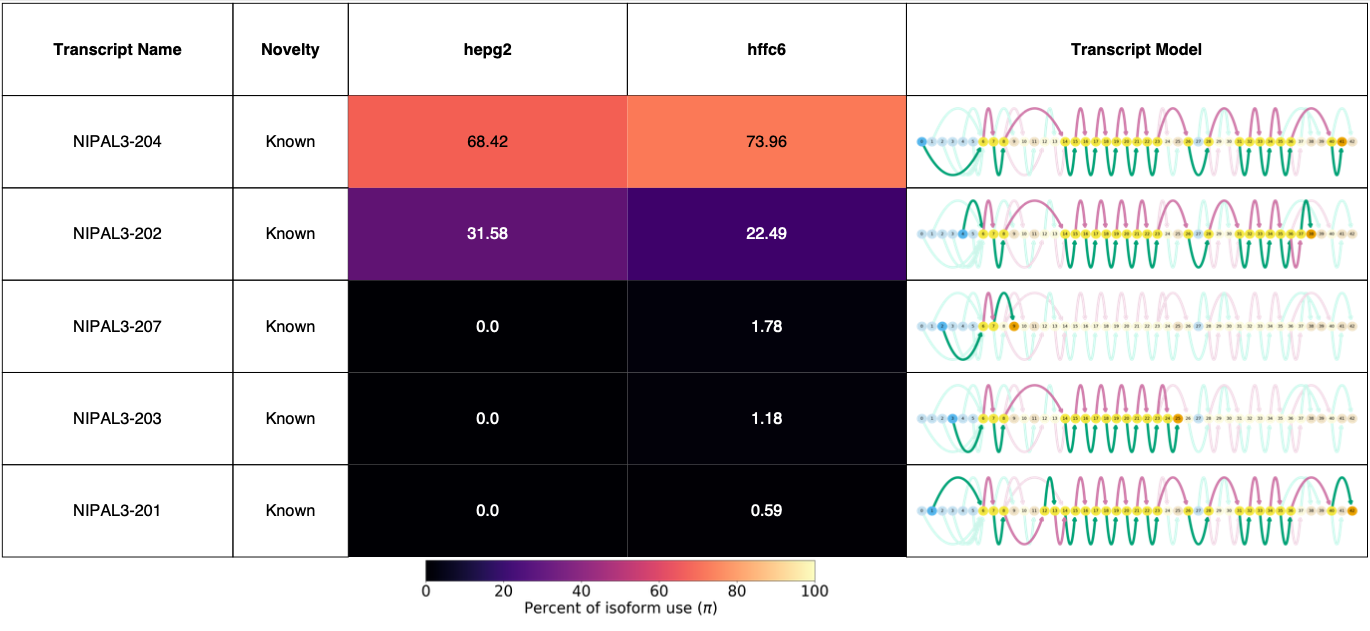

In [65]:
display(Image(filename='figures/nipal3_novel_cell_line_ENSG00000001461.16_report.png'))

Swan now supports using colors to represent metadata categories which can be useful for more complex sets of samples. Swan cannot automatically resize dataset names for gene reports and therefore I recommend using this strategy when plotting a large number of datasets.

First, assign colors to different metadata columns in `sg.adata.obs`. You can use hexcodes or [named Matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html).

In [7]:
sg.set_metadata_colors('cell_line', {'hepg2': 'gold', 'hffc6': '#ba55d3'})

Then use the `metadata_cols` option to indicate what colored metadata categories you'd like to plot at the top of the gene report. Here I'm also demonstrating the option to plot the browser-style transcript representation using the `browser=True` option.

In [69]:
# generate a report for the given gene 
# save it with the given filepath prefix
# plot the percent isoform (pi) values 
# use the magma color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
# group datasets based on the 'cell_line' metadata column
# color cell lines by metadata colors
# plot the genome browser representation of the transcript models
sg.gen_report('ADRM1',
              prefix='figures/adrm1',
              layer='pi',
              cmap='magma',
              display_numbers=True,
              novelty=True, 
              groupby='cell_line',
              transcript_name=True, 
              metadata_cols=['cell_line'],
              browser=True)


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_browser_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_browser_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_browser_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_browser_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_browser_TALONT000301961_path.png
Generating report for ENSG00000130706.12


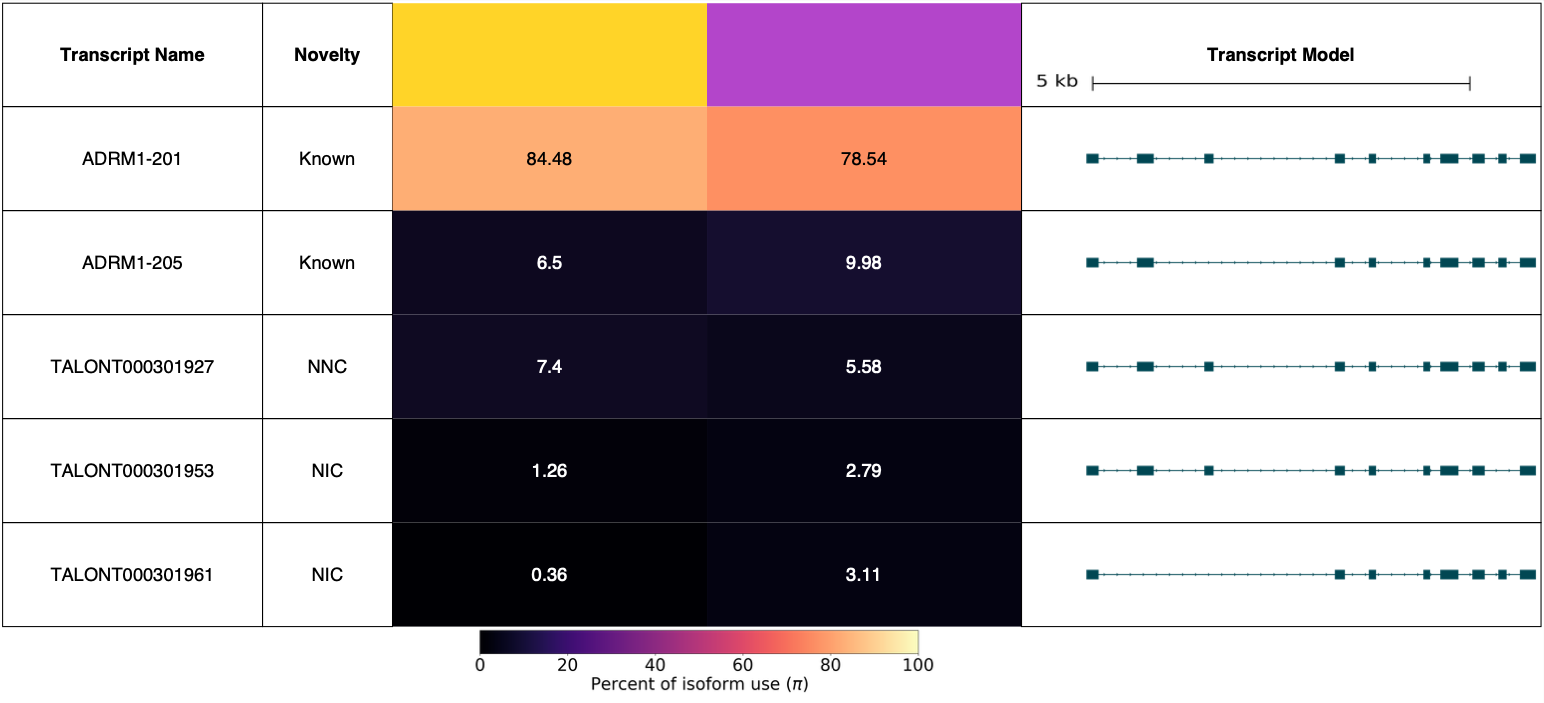

In [71]:
display(Image(filename='figures/adrm1_browser_color_cell_line_ENSG00000130706.12_report.png'))

You can also include more than one metadata column to color.

In [8]:
# from lighter to darker blue
sg.set_metadata_colors('replicate', {'1': '#bef4ff', 
                                     '2': '#73a8b2', 
                                     '3': '#263133'})

In [9]:
# generate a report for the given gene 
# save it with the given filepath prefix
# use the virids color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
# color cell lines and replicates by metadata colors
# plot the genome browser representation of the transcript models
sg.gen_report('ADRM1',
              prefix='figures/adrm1',
              cmap='viridis',
              display_numbers=True,
              novelty=True, 
              transcript_name=True, 
              metadata_cols=['cell_line', 'replicate'],
              browser=True)


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_browser_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_browser_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_browser_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_browser_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_browser_TALONT000301961_path.png
Generating report for ENSG00000130706.12


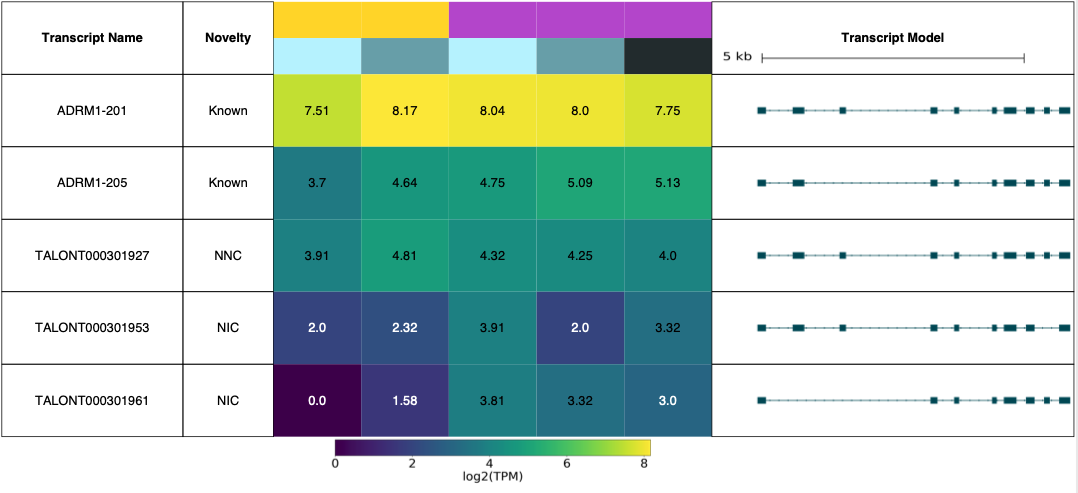

In [79]:
display(Image(filename='figures/adrm1_browser_color_replicate_cell_line_ENSG00000130706.12_report.png'))

Note that if I try to use the `groupby='cell_line` option with `metadata_cols=['cell_line', 'replicate']`, Swan will throw an error because there are multiple distinct replicates that belong to each cell line which makes the groupby impossible.

In [3]:
# example of incompatible groupby and metadata_cols pairing
sg.gen_report('ADRM1',
              prefix='figures/adrm1',
              groupby='cell_line',
              metadata_cols=['cell_line', 'replicate'])

Exception: Metadata column replicate not compatible with groupby column cell_line. Groupby column has more than 1 unique possible value from metadata column.

You can choose what datasets to display in the report using the `columns` option. Columns should be a subset of the datasets (`sg.datasets`) in the SwanGraph if not using the `groupby` option, or a subset of the categories in the metadata column when using `groupby`.

Here I've also demonstrated the `order` option, where you can order the transcripts based on transcript ID, expression level (default), or genomic location of TSS / TES (`'[tid', 'expression', 'tss', 'tes']` respectively).

In [11]:
# generate a report for the given gene 
# save it with the given filepath prefix
# use the virids color way
# group datasets based on the 'cell_line' metadata column
# color cell lines by metadata colors
# restrict data shown to just the 'hffc6' datasets 
#    from the 'cell_line' metadata
# order transcripts based on genomic location of TSS
sg.gen_report('NIPAL3',
              prefix='figures/nipal3',
              cmap='viridis',
              groupby='cell_line',
              metadata_cols=['cell_line'],
              columns=['hffc6'],
              order='tss')


Plotting transcripts for ENSG00000001461.16
Saving transcript path graph for ENST00000374399.8 as figures/nipal3_ENST00000374399.8_path.png
Saving transcript path graph for ENST00000003912.7 as figures/nipal3_ENST00000003912.7_path.png
Saving transcript path graph for ENST00000488155.1 as figures/nipal3_ENST00000488155.1_path.png
Saving transcript path graph for ENST00000358028.8 as figures/nipal3_ENST00000358028.8_path.png
Saving transcript path graph for ENST00000339255.2 as figures/nipal3_ENST00000339255.2_path.png
Generating report for ENSG00000001461.16


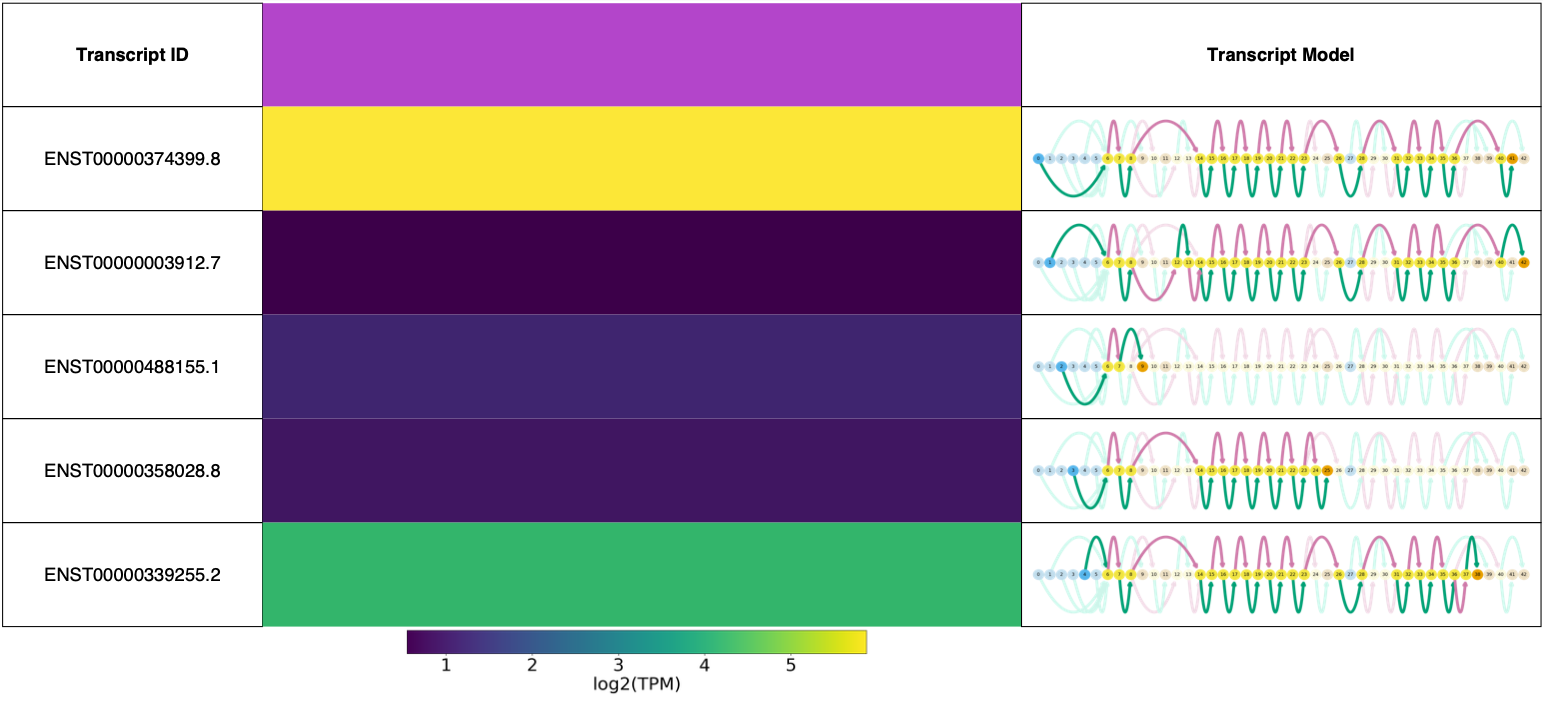

In [12]:
display(Image(filename='figures/nipal3_ENSG00000001461.16_report.png'))

In [2]:
# generate reports for the given genes
# with the given prefix
# only display the input datasets
# display abundance information as TPM numbers
# order the entries in the report by the genomic coordinate
# of each transcript's transcription start site (TSS)
sg.gen_report(['ADRM1','PSAP'], prefix='figures/multi_gene',
            datasets=['HepG2_1', 'HFFc6_1'],
            tpm=True,
            order='TSS')


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/multi_gene_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/multi_gene_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/multi_gene_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/multi_gene_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/multi_gene_TALONT000301961_path.png
Generating report for ENSG00000130706.12

Plotting transcripts for ENSG00000197746.13
Saving transcript path graph for ENST00000394936.7 as figures/multi_gene_ENST00000394936.7_path.png
Saving transcript path graph for TALONT000283514 as figures/multi_gene_TALONT000283514_path.png
Generating report for ENSG00000197746.13


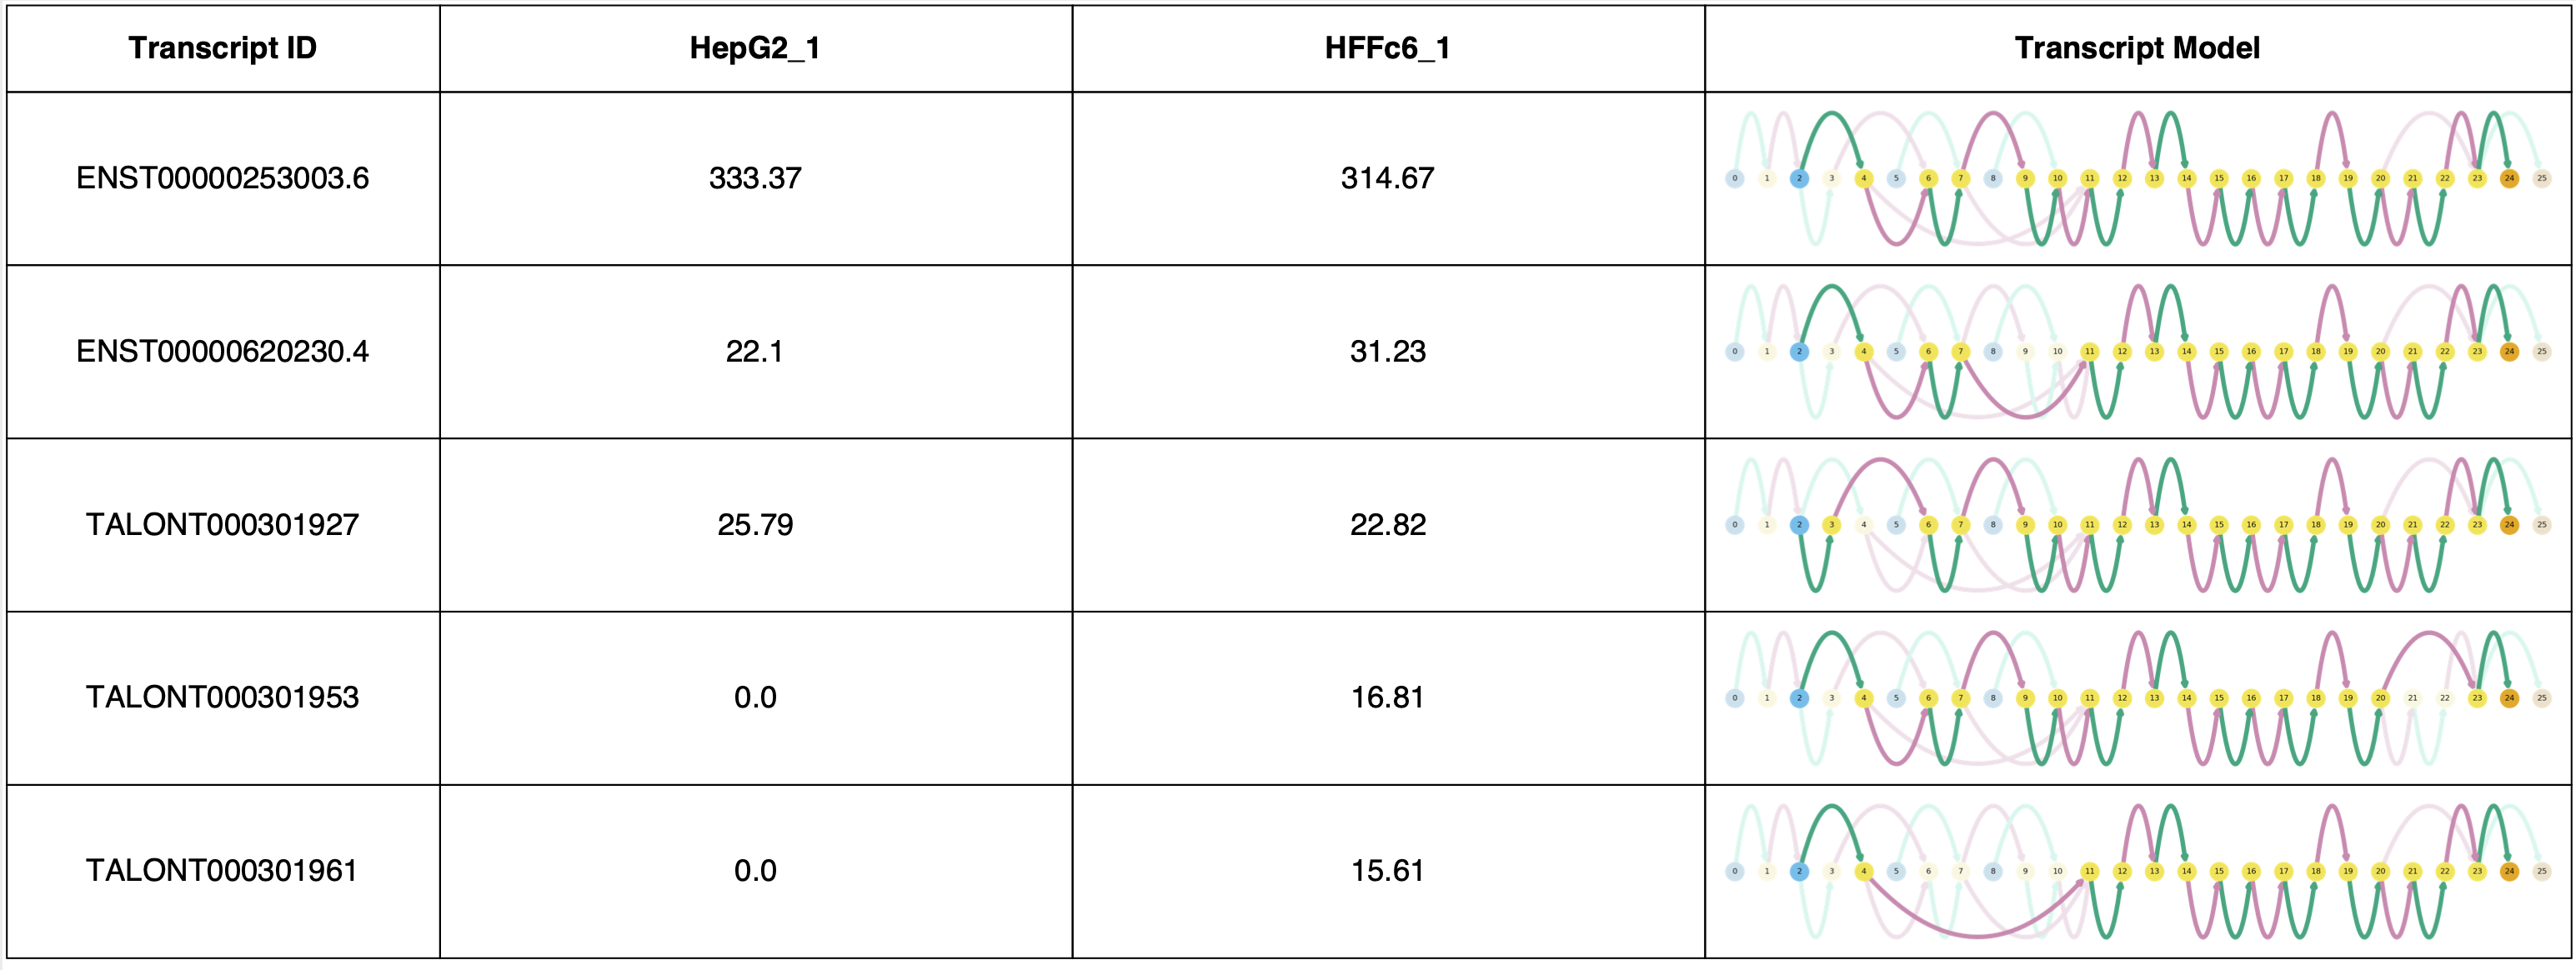

In [10]:
display(Image(filename='figures/multi_gene_ENSG00000130706.12_report.png'))

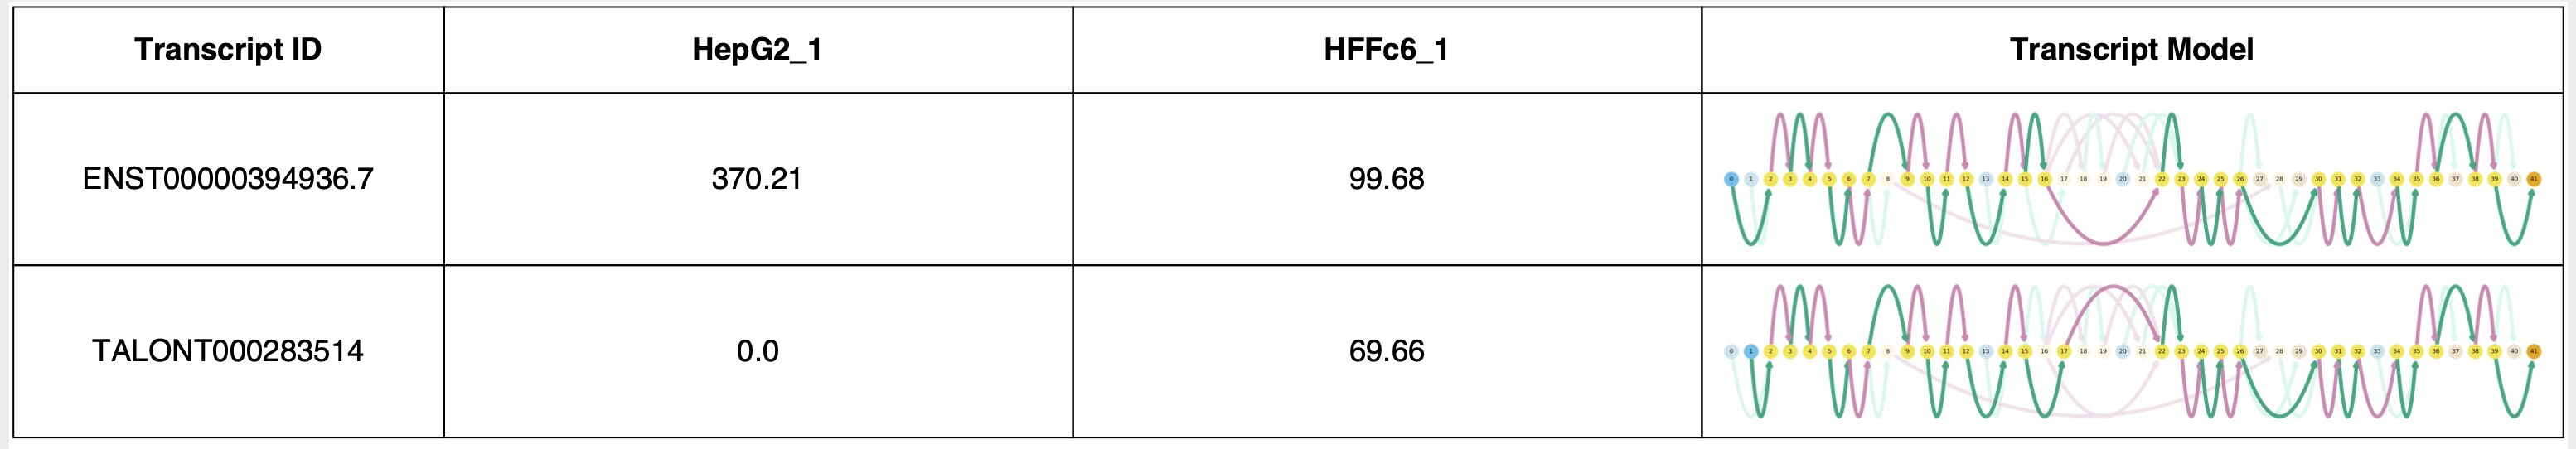

In [11]:
display(Image(filename='figures/multi_gene_ENSG00000197746.13_report.png'))

In [3]:
# generate reports for the given genes
# with the given prefix
# display abundance information as a heatmap
# include differential transcript expression test significance results
# use significance threshold q >= 0.1
# use the browser-style representation as the transcript visualization
sg.gen_report('ADRM1', prefix='figures/adrm1',
             heatmap=True,
             include_qvals=True, q=0.1,
             browser=True)


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_browser_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_browser_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_browser_TALONT000301927_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_browser_TALONT000301961_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_browser_TALONT000301953_path.png
Generating report for ENSG00000130706.12


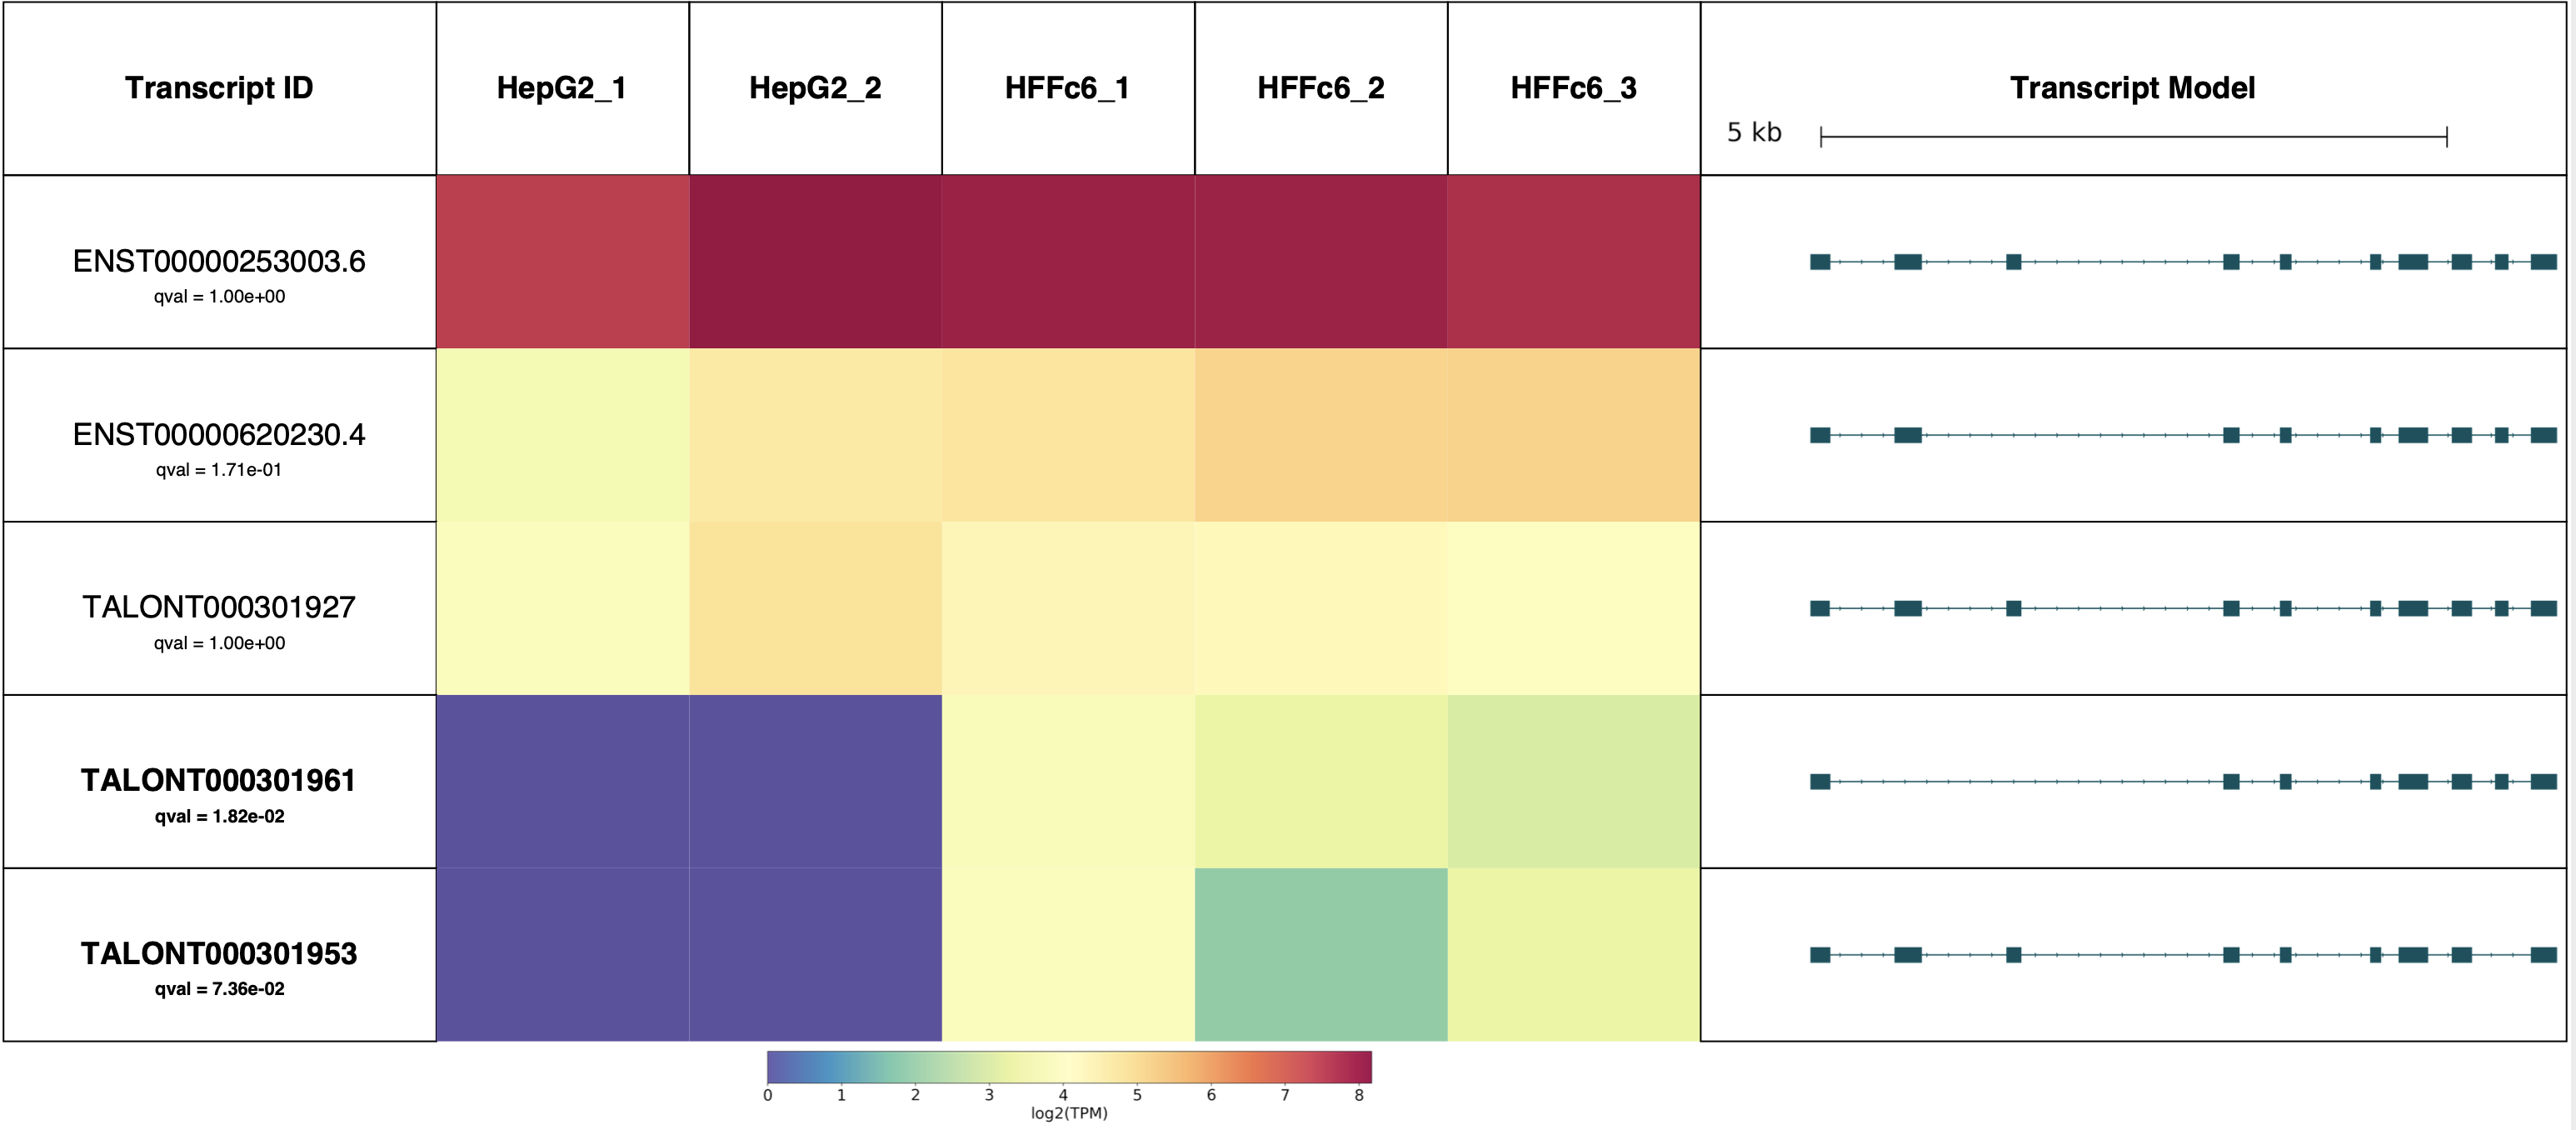

In [8]:
display(Image(filename='figures/adrm1_browser_ENSG00000130706.12_report.png'))